<a href="https://colab.research.google.com/github/geetika18/Tensorflow-Playground/blob/main/01_Neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow
Predicting a numerical variable based on some other combinations of variables. 

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating some data to view and fit

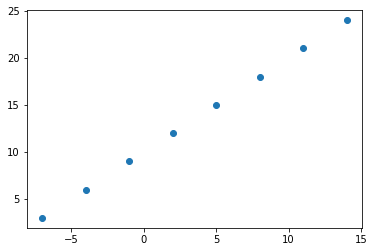

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [ ]:
y == X +10 

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

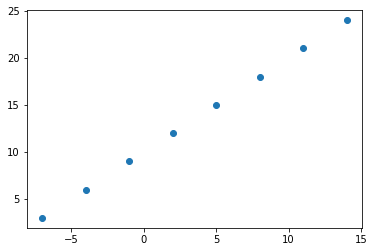

In [ ]:
plt.scatter(X,y)

## steps in modelling with tensorflow
1. **creating a model** - define the input and putput layers as well as hidden layers of a deep learning model.
2. **compiling the model** - define a loss function(function which tells how wrong model is) and the optimiser( tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. **fitting a model** - letting the model try to find patterns between X & y(features and labels).


In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile( loss = tf.keras.losses.mae, # mae = mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. fit model
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 5) # epochs - how many times the model will go through all of the training examples

Epoch 1/5
1/1 [==============================] - 1s 612ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Making a prediction using the model above
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [ ]:
# Improve the model - let's rebuild teh model

# 1. creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile( loss = tf.keras.losses.mae, # mae = mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. fit model
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 100) # epochs - how many times the model will go through all of the training examples

Epoch 1/100
1/1 [==============================] - 1s 604ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 7

In [ ]:
model.predict([17.0]) 

array([[29.739855]], dtype=float32)

In [ ]:
# improve model again 
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation = "relu"),
      tf.keras.layers.Dense(100, activation = "relu"),
      tf.keras.layers.Dense(100, activation = "relu"),
      tf.keras.layers.Dense(1)
  ])

model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["mae"])
  
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 200)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 12.9513 - mae: 12.9513
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 12.5285 - mae: 12.5285
Epoch 3/200
1/1 [==============================] - 0s 12ms/step - loss: 12.1098 - mae: 12.1098
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 11.6979 - mae: 11.6979
Epoch 5/200
1/1 [==============================] - 0s 9ms/step - loss: 11.2893 - mae: 11.2893
Epoch 6/200
1/1 [==============================] - 0s 24ms/step - loss: 10.8902 - mae: 10.8902
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 10.5068 - mae: 10.5068
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 10.1209 - mae: 10.1209
Epoch 9/200
1/1 [==============================] - 0s 24ms/step - loss: 9.7311 - mae: 9.7311
Epoch 10/200
1/1 [==============================] - 0s 12ms/step - loss: 9.3167 - mae: 9.3167
Epoch 11/200
1/1 [==============================] - 0s 11

In [ ]:
model.predict([17.0])

array([[27.807995]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building neural netwroks is: 
...
Build a model --> fit it --> evaluate it --> tweak the model --> fit it --> evaluate it --> tweak the model --> fit it --> evaluate it ...
...

## when it comes to evaluation: 
" Visualize, Visualize, Visualize"
* the data
* the model
* the training of a model
* the predictions of the model


In [ ]:
# make a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for dataset
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

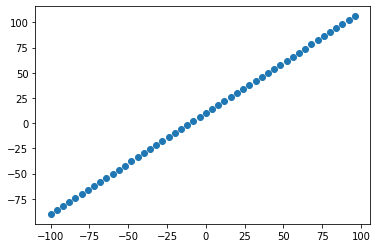

In [ ]:
# visualise data
plt.scatter(X,y)

### The 3 sets...
* training set - the model learns from this data which is typically 70-80 percent of total data you have. 
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* test set - the model gets evaluated on this data to test what is had learned , this set is typically 10-15% of total data available. 

In [ ]:
# check the length of samples
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test
                  )

(40, 10)

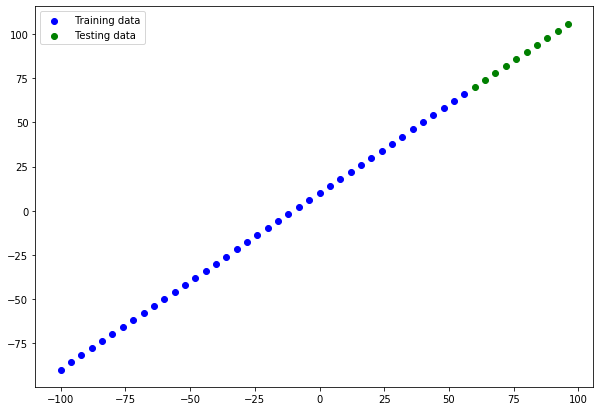

In [ ]:
### Visualizing the data
plt.figure(figsize= (10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c ="b", label = " Training data")
# plot the test data in green
plt.scatter(X_test, y_test, c = "g", label = " Testing data")
# Show legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for the data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

#model.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# let's create a model which builds automatically by defining the input shape

tf.random.set_seed(42)

# Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer"),
], name = "model1")
 # compile model

model.compile(loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.SGD(),
  metrics = ["mae"]
)
 

In [ ]:
# let's fit model to training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose = 0)

In [ ]:
model.summary() 

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - parameters that the model can update as it trains.
* Non trainable parameters : which model can't update. This is typical when you bring in already learned parameters from other models during transfer learning)

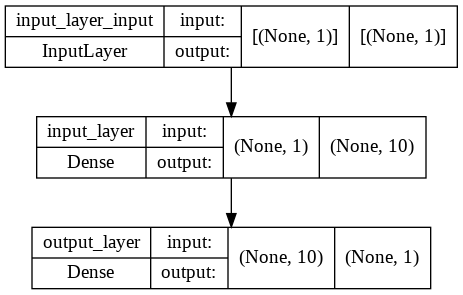

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

### Visualising the model's predictions 
plotting predictions vs ground truth labels

In [ ]:
# make some predictions
y_pred = model.predict(X_test)
y_pred

In [ ]:
y_test

In [ ]:
# let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and copare the predictions to ground truth labels
  """
  plt.figure(figsize = (10,10))

  # plot training data
  plt.scatter(train_data, train_labels, c = "b", label="Training data")
  # plot testing data
  plt.scatter(test_data, test_labels, c = "y", label ="Testing data")
  # plot predictions 
  plt.scatter(test_data, predictions, c ="r", label="Predictions")

  plt.legend()

In [ ]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred)

### Evaluation od model using regression evaluation metrics
there are different evaluation metrics to evaluate your model
Since we are working on regression problem, two of main metrics:
* MAE - mean absolute error, " On average, how wrong is each of my model's predictions"
* MSE - mean square error, " square the average errors"


In [ ]:
# evaluate the model
model.evaluate(X_test, y_test)

In [ ]:
y_pred, y_test

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

In [ ]:
# calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

### Running experiments to improve our model

Build a model--> fit it --> evaluate it--> tweak it--> fit it-->evaluate it

1. get more data
2. make model larger
3. train for longer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create model1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fit model
model_1.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

In [ ]:
# make prediction
y_pred_1 = model_1.predict(X_test)

plot_predictions(predictions = y_pred_1)

In [ ]:
# calculate evaluation on model_1
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

#### Build model_2
 with 2 layers and 100 epochs

In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# fit model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs =100)

In [ ]:
# make and plot predictions
y_pred_2 = model_2.predict(X_test)

plot_predictions(predictions=y_pred_2)

In [ ]:
# evaluate model_2
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

#### Build model_3
2 layers and 500 epochs

In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# fit model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs =500, verbose=0)

In [ ]:
# make and plot predictions
y_pred_3 = model_3.predict(X_test)

plot_predictions(predictions=y_pred_3)
# this model is overfitting 

In [ ]:
# evaluate model_3
mae_3 = mae(y_test, y_pred_3)
mse_3 = mae(y_test, y_pred_3)
mae_3, mse_3

### Comparing tesorflow model experiments results

In [ ]:
# let's compare our models' results using panda dataframe
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns =["model","mae","mse"])
all_results

## Model_2 performed best!!

In [ ]:
model_2.summary()

# A Larger Dataset

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


dependent variable is charges
rest are independent variables

In [ ]:
#one hot encoding - categorical into numerical
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:

# Creating training and test sets
# Build a neural network(sort of like model_2 above)

In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# create training and testing datasets using scikit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X), len(X_train)
                                                


(1338, 1070)

In [ ]:
# Build a model

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([  
    tf.keras.layers.Dense(100),    # extra layer
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),  # using adam optimizer
                        metrics = ["mae"])

history = insurance_model.fit(X_train,y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
# check the results of insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0, 0.5, 'loss')

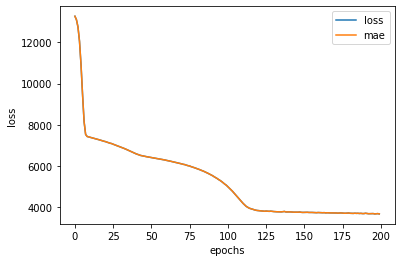

In [ ]:
# plot history ( also known as training curve)
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

When to stop training - earlystopping callback 

## Normalization and standardization(Preprocessing data - scale features)
In terms of scaling values, neural networks tend to prefer normalization.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# To prepare dats we use scikit learn lib
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),   # turn all values in columns between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex","smoker","region"]) 
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# see what data looks like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]


array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Data has been normalised. Now build a neural network to fit on this normalised data.

In [ ]:
tf.random.set_seed(42)

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(500),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                          metrics = ["mae"])

insurance_model_1.fit(X_train_normal, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 8ms/step - loss: 12849.3057 - mae: 12849.3057
Epoch 2/300
34/34 [==============================] - 0s 9ms/step - loss: 8458.1904 - mae: 8458.1904
Epoch 3/300
34/34 [==============================] - 0s 10ms/step - loss: 7401.2744 - mae: 7401.2744
Epoch 4/300
34/34 [==============================] - 0s 9ms/step - loss: 6246.9731 - mae: 6246.9731
Epoch 5/300
34/34 [==============================] - 0s 9ms/step - loss: 4320.8379 - mae: 4320.8379
Epoch 6/300
34/34 [==============================] - 0s 10ms/step - loss: 3662.1116 - mae: 3662.1116
Epoch 7/300
34/34 [==============================] - 0s 9ms/step - loss: 3625.6978 - mae: 3625.6978
Epoch 8/300
34/34 [==============================] - 0s 9ms/step - loss: 3625.5027 - mae: 3625.5027
Epoch 9/300
34/34 [==============================] - 0s 10ms/step - loss: 3583.6277 - mae: 3583.6277
Epoch 10/300
34/34 [==============================] - 0s 9ms/step - loss: 3551.6868 - mae: 3551

In [ ]:
# Evaluate
insurance_model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3159.1399 - mae: 3159.1399


[3159.139892578125, 3159.139892578125]

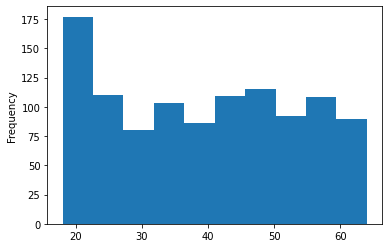

In [ ]:
X_train["age"].plot(kind="hist")